<a href="https://colab.research.google.com/github/ShailendraSSY/Neural-Network/blob/master/M1_AST_06_Numerical_Optimization_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 6: Numerical Optimization

## Learning Objectives

At the end of the experiment, you will be able to

*   understand Linear Least Squares method

*   understand about Constrained Optimization

*   understand about Support Vector Machines 





### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = " 2200023" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9910549998" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_06_Numerical_Optimization_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import Required Packages

In [4]:
from scipy import optimize
from scipy.optimize import linprog                                      # Minimize a linear objective function subject to linear equality and inequality constraints
import numpy as np                                                      # Numpy library        
from scipy.optimize import minimize, fsolve, LinearConstraint           # Minimization of scalar function of one or more variables and Find the roots of a function  
from scipy.linalg import solve                                          # Solves the linear equation set a * x = b for the unknown x for square a matrix
from autograd import grad                                               # Python package for automatic differentiation
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

### Importing required packages for SVM

In [5]:
import pandas as pd                                                       # to read files
import seaborn as sns                                                     # library for statistical data visualization
from matplotlib.colors import ListedColormap                              # for filling colors in mapping
from sklearn.metrics import accuracy_score                                # importing confusion matrix, accuracy score
from sklearn.svm import SVC                                               # importing Support vector classifier, Support Vector Regressor, LinearSVC  
from sklearn.preprocessing import StandardScaler, LabelEncoder            # preprocessing
from sklearn.model_selection import train_test_split                      # for splitting the dataset
from mlxtend.plotting import plot_decision_regions                        # to plot the decision boundaries and hyperplane
from sklearn.pipeline import make_pipeline                                # to import pipeline
from sklearn import datasets
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

## Linear Least Squares 

The least squares method is a statistical strategy for determining the **best fit** for a group of data points by reducing the total of the points' offsets or residuals from the plotted curve. Linear least square method is also a technique which is commonly used in **regression analysis** that falls in the category of **Supervised Learning**. Further, least squares regression is applied to predict the behaviour of dependent variables.

Here, we try to find the best fit line which can represent the relationship between two variables where one is **dependent** and another is **independent** variable.

**Line of best fit**: The line of best fit is a line that runs through a scatter plot of data points and best reflects the relationship between them. The below graph represents the data points and the line of best fit for them.


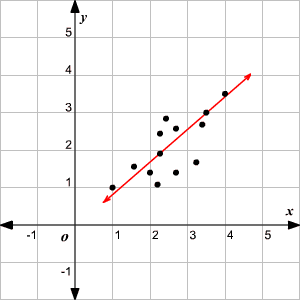

Steps to compute line of best fit:

1. Calculate the slope 'm' of the line using the below formula:

  $m = \frac{n\sum xy - (\sum x)(\sum y)}{n\sum x^2 - (\sum x)^2}$

  m - slope of the line

  n - total number of data points

  x - independent variable

  y - dependent variable

2. Compute the y intercept using the below expression: 

    c = y - mx

3. Substitute all the values in the final equation and plot the line.




Load the data

In [6]:
!wget https://cdn.iisc.talentsprint.com/DLFA//Experiment_related_data/Iris.csv
data_1 = pd.read_csv('Iris.csv')
print(data_1.shape)
print(data_1.head())

--2021-10-03 14:26:03--  https://cdn.iisc.talentsprint.com/DLFA//Experiment_related_data/Iris.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [application/octet-stream]
Saving to: ‘Iris.csv’

Iris.csv            100%[===================>]   4.99K  --.-KB/s    in 0s      

2021-10-03 14:26:04 (312 MB/s) - ‘Iris.csv’ saved [5107/5107]

(150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2

In [7]:
# Declaring X(independent variable) and Y(dependent variable) 
X = data_1['PetalLengthCm'].values
Y = data_1['PetalWidthCm'].values

Calculating the coefficients

In [8]:
# Mean X and Y as per the formula 
mean_x = np.mean(X)
mean_y = np.mean(Y)
# Total number of values
n = len(X)
mean_x

3.758666666666666

In [9]:
# Calculate 'm' and 'c' using the formula
numerator = 0
denominator = 0
for i in range(n):
  numerator += (X[i]-mean_x)*(Y[i]-mean_y)
  denominator += (X[i]-mean_x)**2
m = numerator/denominator
c = mean_y - (m*mean_x)
print("Coefficients are:",m,c)

Coefficients are: 0.4164191322854012 -0.3665140452167275


Plotting the values and regression line

In [10]:
max_x = np.max(X)
min_x = np.min(X)
# Calculating line values x and y
x = np.linspace(min_x,max_x,100)
y = c + m*x


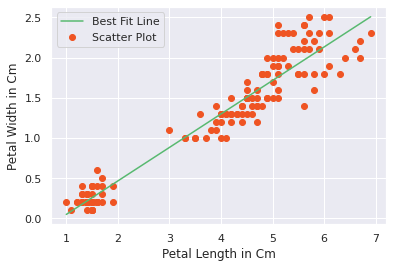

In [11]:
# Plotting the best fit line
plt.plot(x,y,color = '#58b970',label = 'Best Fit Line')
# Plotting Scatter points
plt.scatter(X,Y,color = '#ef5423', label = 'Scatter Plot')
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.legend()
plt.show()

**RMSE**: The standard deviation of the residuals is known as **Root Mean Square Error (RMSE)** (prediction errors). Further, the residuals are an estimate of how distant the data points are from the regression line. In other words, it indicates how closely the data is clustered around the line of best fit.

**Note**: Lower RMSE value indicates goodness of a model.

In [12]:
# Caculating Root Mean Square Error
rmse = 0
for i in range(n):
  y_pred = c + m * X[i]
  rmse += (Y[i] - y_pred)**2
rmse = np.sqrt(rmse/n)
print("RMSE is :",rmse)

RMSE is : 0.20564519522586527


## Introduction to Optimization

Optimization is an important tool in decision science and the analysis of physical systems. To make use of this tool, first identify some objective, a quantitative measure of the performance of the system under study. This objective could be profit, time, potential energy, or any quantity or combination of quantities that can be represented by a single number. The objective depends on certain characteristics of the system, called variables or unknowns. Here, the goal is to find the values of the variables that optimize the objective function.

The process of identifying objective, variables, and constraints for a given problem is known as *modeling*. This step is mostly the first and the most important step in the optimization process. After an optimization algorithm has been applied to the model, we must be able to recognize whether it has succeeded in its task of finding a solution. 



#### Constrained optimization

The general **constrained optimization** task is to maximize or minimize a function $f(x)$ by varying $x$, given certain constraints on $x$. 

Eg. Find minimum of $f(x_1,x_2,x_3) = x_1^2 + x_2^2 + x_3^2,  where \lVert x_2\rVert \geq1$

Eg. Designing the fastest vehicle with a constraint on fuel efficiency

An optimization problem comprises of three basic components:

- $x$: is the vector of variables, also called unknowns or parameters;
- $f$: is the objective function, a (scalar) function of x that we want to maximize or
minimize;
- $c_i$: are constraint functions, which are scalar functions of x that define certain equations
and inequalities that the unknown vector x must satisfy.

Using this notation, the optimization problem can be written as follows:

$\min\limits_{x \in R^{N}}$ $f(x)$  

$\textrm{subject to}$ $\hspace{1cm} c_i(x) = 0, \hspace{0.25cm} i \in \xi$

$\hspace{2.75cm}$ $c_i(x)\geq0, \hspace{0.25cm} i \in I$

Here $I$ and $\xi$ are sets of indices for equality and inequality constraints.



#### Equality and Inequality Constraints

Consider the following general constrained optimization problem:

$\max\limits_{x_i \in R}$ $f(x_1,. . . . , x_n)$ 

subject to: 

$g_1(x_1, . . . , x_n) \leq b_1, . . . , g_k(x_1, . . . , x_n) \leq b_k$,

$h_1(x_1, . . . , x_n) = c_1, . . . , h_m(x_1, . . . , x_n) = c_m$

The function $f(x)$ is called the objective function, $g(x)$ is called an *inequality constraint*, and $h(x)$ is called an *equality constraint*. In the above problem, there are $k$ *inequality constraints* and $m$ *equality constraints*. In the following, we will always assume that $f, g$, and h are $C^{1}$ functions, i.e. that they are differentiable and their derivatives are continuous.

Notice that this problem differs from the regular unconstrained optimization problem instead of finding the maximum of $f(x)$ we are finding the maximum of $f(x)$ only over the points which satisfy the constraints


### Example: Stockbroker Income

Let’s try a demonstration on how to use `minimize()`. Imagine you’re a stockbroker who’s interested in maximizing the total income from the sale of a fixed number of your stocks. You have identified a particular set of buyers, and for each buyer, you know the price they’ll pay and how much cash they have on hand.

There is one constraint on the problem, which is that the sum of the total shares purchased by the buyers does not exceed the number of shares you have on hand. There are also bounds on each of the solution variables because each buyer has an upper bound of cash available, and a lower bound of zero. Negative solution x-values mean that you’d be paying the buyers!

Steps we will follow to solve the problem:

1. Initialize the variables

2. Create arrays for storing price, money available with the buyers, and shares per buyer.

3. Setting the constraints

4. Setting the bounds

5. Declaring the 'objective function'.

6. Applying constrained optimization using minimize() method from scipy.

Solving Optimization Problem

In [13]:
# set variables to determine the number of buyers in the market and the number of shares you want to sell
n_buyers = 10

n_shares = 15

Next, create arrays to store the price that each buyer pays for the shares, the maximum amount they can afford to spend, and the maximum number of shares each buyer can afford, given the first two arrays.

In [14]:
np.random.seed(10)

# Generating the array of prices the buyers will pay
# np.random.random() creates an array of random numbers
# on the half-open interval [0,1)
prices = 100*np.random.random(n_buyers)

# generate an array of integers on the half-open interval from [1, 4), 
# again with the size of the number of buyers
money_available = 100*np.random.randint(1, 4, n_buyers)

print("Price of the shares 1-{} : {}".format(n_shares, prices))
print("Money available with each buyer (1-{}): {}".format(n_buyers, money_available))

Price of the shares 1-15 : [77.13206433  2.07519494 63.36482349 74.88038825 49.85070123 22.47966455
 19.80628648 76.05307122 16.91108366  8.83398142]
Money available with each buyer (1-10): [100 100 100 300 100 300 300 200 100 100]


Now, you need to compute the maximum number of shares each buyer can afford:

In [15]:
# take the ratio of the money_available with prices to determine the maximum number of shares each buyer can purchase
n_shares_per_buyer = money_available / prices

print("No of shares per buyer:\n",n_shares_per_buyer)

No of shares per buyer:
 [ 1.29647768 48.18824404  1.57816269  4.00638948  2.00598984 13.34539487
 15.14670609  2.62974258  5.91328161 11.3199242 ]


Now, you need to create the constraints and bounds for the solver.

 Remember that LinearConstraint takes the dot product of the input array with the solution values and compares it to the lower and upper bound. You can use this to set up the constraint on n_shares:

In [16]:
# create an array of ones with the length `n_buyers` as `LinearConstraint` takes the first argument as matrix
# lb and ub are equal as it represents equality constraints 
# For example, a machine component may be required to move precisely by Δ to perform the desired operation, 
# so we must treat this as an equality constraint. 
constraint = LinearConstraint(np.ones(n_buyers), lb = n_shares, ub = n_shares)

Since `LinearConstraint` takes the dot product of the solution vector with this argument, it’ll result in the sum of the purchased shares.

This result is then constrained to lie between the other two arguments:

1. The lower bound lb
2. The upper bound ub

Next, create the bounds for the solution variable. The bounds limit the number of shares purchased to be 0 on the lower side and `n_shares_per_buyer` on the upper side. The format that `minimize()` expects for the bounds is a sequence of tuples of lower and upper bounds:

In [17]:
bounds = [(0, n) for n in n_shares_per_buyer]
bounds

[(0, 1.296477682439221),
 (0, 48.18824403823818),
 (0, 1.5781626853523065),
 (0, 4.006389483224008),
 (0, 2.0059898362934296),
 (0, 13.3453948697305),
 (0, 15.146706090719757),
 (0, 2.629742583593113),
 (0, 5.913281610609325),
 (0, 11.319924196695919)]

In [18]:
# Here the objective function returns negative of dot product of 'x' declared as 'x0' below 
# and 'prices' which indicates that we are minimizing the value
def objective_function(x, prices):
    return -x.dot(prices)

In this code, you define `objective_function()` to take two arguments. Then you take the dot product of x with prices and return the negative of that value. Remember that you have to return the negative because you’re trying to make that number as small as possible, or as close to negative infinity as possible. Finally, you can call `minimize()`:

In [19]:
res = minimize(
    objective_function,
    x0 = 10 * np.random.random(n_buyers),
    args = (prices),
    constraints=constraint,
    bounds=bounds,
)

In this code, res is an instance of OptimizeResult, just like with `minimize_scalar()`. As you’ll see, there are many of the same fields, even though the problem is quite different. In the call to `minimize()`, you pass five arguments:

1. objective_function
2. $x_0$
3. args
4. constraints
5. bounds

Once the solver runs, you should inspect `res` by printing it:

In [20]:
res

     fun: -878.3020157082726
     jac: array([-77.13206482,  -2.07519531, -63.36482239, -74.88038635,
       -49.85070038, -22.47966766, -19.80628967, -76.05307007,
       -16.91108704,  -8.83398438])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.29647768, 0.        , 1.57816269, 4.00638948, 2.00598984,
       3.48323773, 0.        , 2.62974258, 0.        , 0.        ])

You should also check and make sure that the constraints and bounds that you set are satisfied. You can do this with the following code:

In [21]:
print("The total number of shares is:", sum(res.x))
print("Leftover money for each buyer:", money_available - res.x * prices)
print("Money Exhausted:\n",res.x * prices)

The total number of shares is: 14.999999999977872
Leftover money for each buyer: [1.42108547e-14 1.00000000e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21697984e+02 3.00000000e+02 0.00000000e+00
 1.00000000e+02 1.00000000e+02]
Money Exhausted:
 [100.           0.         100.         300.         100.
  78.30201571   0.         200.           0.           0.        ]


## Support Vector Machine

**Support vector machines** are a set of supervised learning methods used for classification, regression, and outliers detection. 

A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.

**Hyperplanes** are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.
 * The hyperplane with maximum margin is called the optimal hyperplane.

**Support vectors** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. 

**Margin** is the width that the boundary could be increased by before hitting a data point.

![wget](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png)






#### Implementing the SVM algorithm

Linearly separable, binary classification:

Using the notation and steps provided by [Tristan Fletcher](https://static1.squarespace.com/static/58851af9ebbd1a30e98fb283/t/58902fbae4fcb5398aeb7505/1485844411772/SVM+Explained.pdf) the general steps to solve the SVM problem are the following:

1. Create P where $H_{i,j}= y^{(i)}y^{(j)}<x^{(i)}x^{(j)}>$

2. Calculate $w=\sum_{i}^{m}y^{(i)} \alpha_{i}x^{(i)}$

3. Determine the set of support vectors S by finding the indices such that $\alpha_{i}>0$

4. Calculate the intercept term using $b=y^{(s)}−\sum_{m ∈ S} \alpha_{m}y^{(m)}<x^{(m)}x^{(s)}>$

5. For each new point $x'$ classify according to $y′=sign(w^{T}x′+b)$

#### Re-writing the problem in an appropriate format

Since we will solve this optimization problem using the [CVXOPT](https://cvxopt.org/userguide/coneprog.html#quadratic-programming) library in python we will need to match the solver's API which, according to the documentation is of the form:

$min \frac{1}{2}x^{T}Px+q^{T}x$

$s.t.  G_{x}\leq h$
 
$Ax=b$

With API

    cvxopt.solvers.qp(P, q[, G, h[, A, b[, solver[, initvals]]]])

Recall that the dual problem is expressed as:

$max \sum_{i}^{m} \alpha_{i}−\frac{1}{2}\sum_{i,j}^{m} y^{(i)}y^{(j)} \alpha_{i} \alpha_{j}<x^{(i)}x^{(j)}>$

Let H be a matrix such that $H_{i,j}= y^{(i)}y^{(j)}<x^{(i)}x^{(j)}>$, then the optimization becomes:

$max \sum_{i}^{m} \alpha_{i}−\frac{1}{2} \alpha^{T} H \alpha$

$s.t. \alpha_{i}\geq0$ 

$\sum_{i}^{m}\alpha_{i} y^{(i)}=0$

We convert the sums into vector form and multiply both the objective and the constraint by −1 which turns this into a minimization problem and reverses the inequality

$min \frac{1}{2}\alpha^{T}H\alpha - 1^{T}\alpha$

$s.t. - \alpha_{i}\leq0$

$s.t. y^{T}\alpha = 0$

We are now ready to convert our numpy arrays into the cvxopt format, using the same notation as in the documentation this gives

P:  $H$ a matrix of size $m×m$

q: $\vec{-1}$  a vector of size $m×1$

G: $−diag[1]$ a diagonal matrix of -1s of size $m×m$

h: $\vec{0}$  a vector of zeros of size $m×1$

A: $y$ the label vector of size $m×1$

b: $0$ a scalar









Note that in the simple example of $m=2$ the matrix $G$ and vector h which define the constraint are

$$G = \begin{bmatrix}
-1 & 0 \\
0 & 1 \\
\end{bmatrix} and $$ $$h = \begin{bmatrix}
-1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

#### Computing the matrix H in vectorized form


Consider the simple example with 2 input samples $(\left\{x^{(1)}, x^{(2)}\right\} \in \mathbb{R}^{2})$ which are two dimensional vectors. i.e. $
x^{(1)}=\left(x_{1}^{(1)}, x_{2}^{(1)}\right)^{T}$

$$X = \begin{bmatrix}
x^{(1)}_{1} & x^{(1)}_{2} \\
x^{(2)}_{1} & x^{(2)}_{2} \\
\end{bmatrix}, y = \begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\end{bmatrix}$$ 

We now proceed to creating a new matrix $X$ where each input sample $x$ is multiplied by the coresponding output label $y$.
This can be done easily in Numpy using vectorization and padding.

$$X' = \begin{bmatrix}
x^{(1)}_{1}y^{(1)} & x^{(1)}_{2}y^{(1)} \\
x^{(2)}_{1}y^{(2)} & x^{(2)}_{2}y^{(2)} \\
\end{bmatrix}$$

Finally we take the **matrix multiplication** of $X′$ and its transpose giving $H=X'X'T$


$$H = X'@X'^{T} = \begin{bmatrix}
x^{(1)}_{1}y^{(1)} & x^{(1)}_{2}y^{(1)} \\
x^{(2)}_{1}y^{(2)} & x^{(2)}_{2}y^{(2)} \\
\end{bmatrix} 
\begin{bmatrix}
x^{(1)}_{1}y^{(1)} & x^{(2)}_{1}y^{(2)} \\
x^{(1)}_{2}y^{(1)} & x^{(2)}_{2}y^{(2)} \\
\end{bmatrix}$$


$$
H = \begin{bmatrix}
x_{1}^{(1)} x_{1}^{(1)} y^{(1)} y^{(1)}+x_{2}^{(1)} x_{2}^{(1)} y^{(1)} y^{(1)} & x_{1}^{(1)} x_{1}^{(2)} y^{(1)} y^{(2)}+x_{2}^{(1)} x_{2}^{(2)} y^{(1)} y^{(2)} \\ 
x_{1}^{(2)} x_{1}^{(1)} y^{(2)} y^{(1)}+x_{2}^{(2)} x_{2}^{(1)} y^{(2)} y^{(1)} & x_{1}^{(2)} x_{1}^{(2)} y^{(2)} y^{(2)}+x_{2}^{(2)} x_{2}^{(2)} y^{(2)} y^{(2)}
\end{bmatrix}
$$

Dataset and inspection

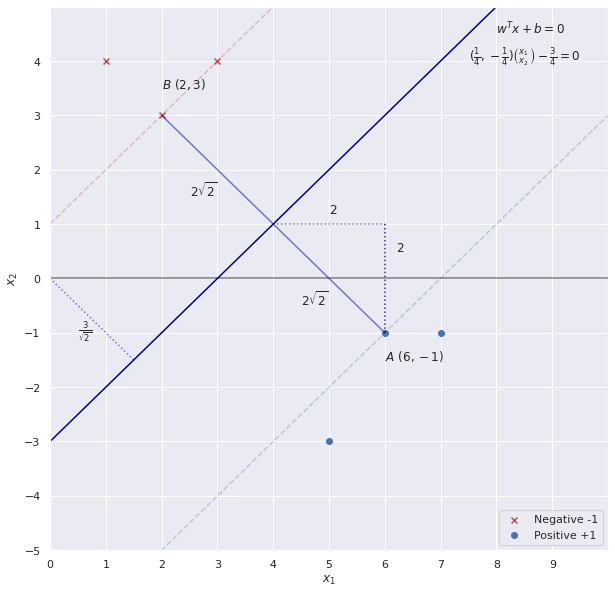

In [22]:
#Data set
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3]])
y_pos = np.array([1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

#Data for the next section
X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos,y_neg))

#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3

#Plot
fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)
plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )
plt.plot([0,1.5],[0,-1.5],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

#Annotations
plt.annotate(s = '$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
plt.annotate(s = '$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
plt.annotate(s = '$2$', xy = (5,1.2), xytext = (5,1.2) )
plt.annotate(s = '$2$', xy = (6.2,.5), xytext = (6.2,.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
plt.annotate(s = '$w^Tx + b = 0$', xy = (8,4.5), xytext = (8,4.5))
plt.annotate(s = '$(\\frac{1}{4},-\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (7.5,4), xytext = (7.5,4))
plt.annotate(s = '$\\frac{3}{\sqrt{2}}$', xy = (.5,-1), xytext = (.5,-1))

#Labels and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')
plt.show()

In [23]:
#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [24]:
#Run solver
%%time
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
#alphas = np.array(sol['x'])

CPU times: user 3.18 ms, sys: 5.06 ms, total: 8.24 ms
Wall time: 6.94 ms


Compute w and b parameters

In [25]:
#w parameter in vectorized form
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [0.0625     0.06249356]
w =  [ 0.24999356 -0.25000644]
b =  [-0.74996781]


In [26]:
support_vector_boolean = (alphas > 1e-4).reshape(-1)

In [27]:
print("Following are the support vectors:\n{}".format(X[support_vector_boolean]))

Following are the support vectors:
[[ 6 -1]
 [ 2  3]]


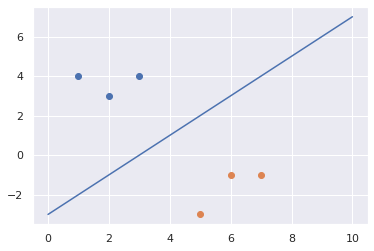

In [28]:
plt.scatter(x_neg[:, 0], x_neg[:,1])
plt.scatter(x_pos[:, 0], x_pos[:,1])
X1 = np.linspace(0, 10, 11)
X2 = (-b[0]-w[0]*X1)/w[1]
plt.plot(X1, X2)

Comparing to Sklearn results

In [29]:
clf = SVC(C = 10, kernel = 'linear')

In [30]:
%%time
clf.fit(X, y.ravel())

CPU times: user 1.29 ms, sys: 302 µs, total: 1.59 ms
Wall time: 1.63 ms


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [5 0]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.0625 0.0625]]


### Please answer the questions below to complete the experiment:




In [32]:
#@title Q.1. Use least-squares regression method to fit a straight line for x = [1, 3, 5, 7, 10, 12, 13, 16, 18, 20] and y = [4, 5, 6, 5, 8, 7, 6, 9, 12, 11].  { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","y = 0.3725x - 3.3888", "y = 0.3725x + 3.3888", "y = -0.3725x + 3.3888", "y = -0.3725x - 3.3888"]


In [33]:
#@title Q.2. Use Lagrange multipliers to find the maxima and minima values of f( x, y ) = 3x−4y subject to the constraint x^2+3y^2 = 129, if such values exist. { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","Maxima = 11, Minima = -11", "Maxima = 48, Minima = -48", "Maxima = 43, Minima = -43", "Maxima = 24, Minima = -24"]

In [34]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [35]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [36]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [37]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [38]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [39]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Question 1
